In [82]:
import math
from IPython.display import Image

In [83]:
# Thrust 
F = 66.7233
#Specific Heat
kc = 1.1404
kt = 1.1426
ke = 1.1995
kn = 1.2
#O/F Ratio
OF = 5
#Exit Pressure (atm)
Peatm = 1
#Temperatures (K)
T0 = 2952.39
Te = 2220.51
#Molar Weight at Throat (mwt, from NASA CEA)
mwt=26.404
#Chamber Pressure (psi)
p0psi = 100

# **Convert All Units**

In [84]:
Pe = Peatm * 101325
p0 = p0psi * 6894.76
print(f' Pe: {Pe}')
print(f' P0: {p0}')

 Pe: 101325
 P0: 689476.0


# **Exhaust Gas Constant, $R$**

## **$R=\frac{R_u}{M}=\frac{8314}{M}$**

In [85]:
R=(8314/mwt)
print(R)

314.87653385850626


# **Temperature at Throat**

## **$T_t=\frac{2T_0}{k+1}$**

In [86]:
Tt=(2*T0)/(kt+1)
print(Tt)

2755.8947073648837


# **Local Speed of Sound at Throat**

## **$a=\sqrt{kRT_t}$** 

In [87]:
vt=math.sqrt(kt*R*Tt)
print(vt)

995.7459949520127


# **Exit Velocity**

# **$v_e=\sqrt{\frac{2k}{k-1}RT_0[1-(\frac{P_e}{P_0})^\frac{(k-1)}{k}]}$**

In [88]:
ve=math.sqrt((((2*ke)/(ke-1))*R*T0)*(1-((Pe/p0)**((ke-1)/ke))))
print(ve)

1747.2000830495565


# **Mass Flow Rate**

## **$ṁ=\frac{F}{v_2}=\frac{F}{\sqrt{\frac{2k}{k-1}RT_0[1-(\frac{P_e}{P_0})]^\frac{(k-1)}{k}}}$**

In [89]:
mdot= F/ve
print(f'mass flow rate: {mdot} kg/s')

mass flow rate: 0.03818870010785565 kg/s


## **$ṁ=\frac{P_cA^s}{\sqrt{\frac{RT_c}{k}}}[\frac{k+1}{2}]^\frac{2(k-1)}{k+1}$**

# **Specific Volume at Nozzle Inlet ($V_1$ and $V_0$)**

## **$V_1=\frac{(RT_0)}{p_0}$**~$V_0$

In [90]:
V1=(R*T0)/p0
print(V1)

1.3483258732697228


# **Specific Volume at Nozzle Throat (Vt)**

## **$V_t=V_1[\frac{(k+1)}{2}]^\frac{1}{(k-1)}$**

In [91]:
Vt=V1*(((kt+1)/2)**(1/(kt-1)))
print(Vt)

2.1854967362861735


# **Exit Specific Volume**

## **$V_e=V_1(\frac{p_0}{P_e})^\frac{1}{k}$**

In [92]:
Ve=V1*((p0/Pe)**(1/ke))
print(Ve)

6.6693924557967375


# **Throat Area**

## **$A_{t}=\frac{ṁ\sqrt{Tc}}{P_{c}}\sqrt{\frac{R}{k}\left(\frac{k+1}{2}\right)^{\frac{\left(k+1\right)}{\left(k-1\right)}}}$**

In [93]:
At=((mdot*math.sqrt(T0))/p0)*math.sqrt(((R/kt)*(((kt+1)/(2))**((kt+1)/(kt-1)))))
print(f'Area: {At} m^2')
dia=2*math.sqrt((At/math.pi))
print(f'Diameter: {dia} m')
diain = dia*39.37
print(f'Diameter (in): {diain} in')

Area: 8.381784096731629e-05 m^2
Diameter: 0.010330546436365797 m
Diameter (in): 0.4067136131997214 in


# **Nozzle Exit Mach Number**

## **$M_e=\frac{v_e}{\sqrt{kRT_e}}$**

In [94]:
Me=ve/(math.sqrt((ke*R*Te)))
print(Me)

1.9078577950180966


# **Nozzle Exit Area**

## **$A_e=\frac{A_t}{M_e}[\frac{2}{k+1}(1+\frac{k-1}{2}M_e^2)]^\frac{k+1}{2(k-1)}$**

In [95]:
Ae=(At/Me)*(((2/(ke+1))*(1+((ke-1)/2)*Me**2))**((ke+1)/(2*(ke-1))))
print(f'Area: {Ae} m^2')
diae=2*math.sqrt((Ae/math.pi))
print(f'Diameter: {diae} m')
diaine = diae*39.37
print(f'Diameter (in): {diaine} in')

Area: 0.00014345413833963657 m^2
Diameter: 0.01351486151575124 m
Diameter (in): 0.5320800978751263 in


# Chamber Sizing 

## Contraction Ratio

In [96]:
Ec = 8

## Chamber Area

## **$A_{c}=ε_{c}A_{t}$**

In [97]:
Ac=Ec*At
print(f'Chamber Area: {Ac} m^2')

Chamber Area: 0.0006705427277385303 m^2


## Chamber Diameter

## **$D_{c}=2\sqrt{\frac{A_{c}}{\pi}}$**

In [98]:
Dc = 2*math.sqrt((Ac/math.pi))
Dci = Dc*39.37
print(f'Chamber Diameter: {Dc} m')
print(f'Chamber Diameter: {Dc*39.37} in')

Chamber Diameter: 0.02921919775406711 m
Chamber Diameter: 1.150359815577622 in


## Chamber Volume

## **$V_{c}=L^*\cdot A_{t}$**

In [99]:
L=2

In [100]:
Vc = L*At
print(f'Chamber Volume: {Vc} m^3')

Chamber Volume: 0.00016763568193463259 m^3


## Chamber Length

## **$L_{c}=\frac{V_{c}}{\pi D_{cm}^{2}}$**

In [101]:
Lc = Vc/(math.pi*(Dc**2))
Lci = Lc *39.37
print(f'Chamber Length: {Lc} m')
print(f'Chamber Length (in): {Lc*39.37} in')

Chamber Length: 0.06250000000000001 m
Chamber Length (in): 2.4606250000000003 in


# **Nozzle Dimensions for CAD**

![hi](images/contour.png)

In [102]:
R1 = 1.5*diain
R2 = R1 
Rn = .382*diain

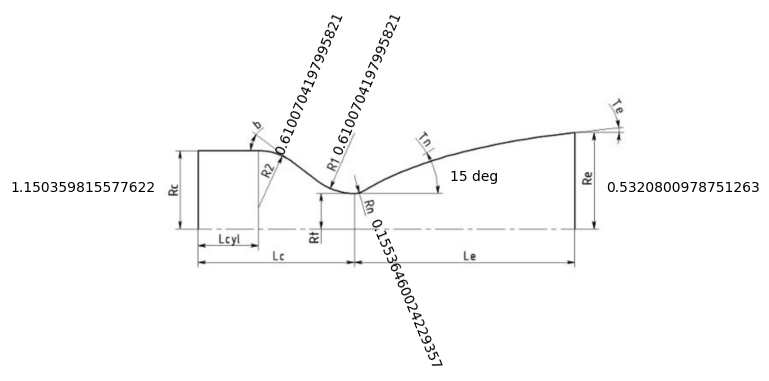

In [103]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = mpimg.imread('contour.png')

# Create a figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Add the label
ax.text(440, 160, f'{R1}', fontsize=10, color='black', rotation=67)
ax.text(300, 160, f'{R2}', fontsize=10, color='black', rotation=67)
ax.text(525, 675, f'{Rn}', fontsize=10, color='black', rotation=-67)
ax.text(1100, 250, f'{diaine}', fontsize=10, color='black')
ax.text(725, 225, f'{15} deg', fontsize=10, color='black')
ax.text(-330, 250, f'{Dci}', fontsize=10, color='black')
# x, y are coordinates for the label position
# fontsize, color, ha (horizontal alignment), va (vertical alignment) can be adjusted

# Remove axes for cleaner look (optional)
ax.axis('off')

# Show the plot
plt.show()

# **Feed System Sizing**

![hi](images/feed.png)

In [104]:
#mdotL = mdot * 1/2
#pG = 
#RG = 
#TG = 
#dL = 

In [105]:
#mdotG=(mdotL*pG)/(dL*RG*TG)

# **Injector Sizing** 

## **$ṁ=C_dA\sqrt{2ρΔP}$**

## Mass flow rate as a function of the coefficient of discharge, area, density, and pressure drop. This can be rearranged to find the Area of the injector orifice.

## **$A=\frac{ṁ}{C_d\sqrt{2ρΔP}}$**

In [106]:
#defining  variables & calculating specific mdot
deltaP = 50 * 6894.76
rhoF = 789
rhoO = 17.5
Cd = .6
mdotF = mdot/(OF+1) 
mdotO = (mdot*OF)/(OF+1)
print(mdotF)
print(mdotO)

0.006364783351309275
0.03182391675654637


In [107]:
injAF = mdotF/(Cd*math.sqrt(2*rhoF*deltaP))
injAO = mdotO/(Cd*math.sqrt(2*rhoO*deltaP))
print(f'Ethanol Injector Area: {injAF} m^2')
print(f'Nitrous Injector Area: {injAO} m^2')
injDF = 2*math.sqrt(injAF/math.pi)
injDO = 2*math.sqrt(injAO/math.pi)
print(f'Ethanol Injector Diameter: {injDF * 39.37} in')
print(f'Nitrous Injector Diameter: {injDO * 39.37} in')

Ethanol Injector Area: 4.548144944666291e-07 m^2
Nitrous Injector Area: 1.5269463506030685e-05 m^2
Ethanol Injector Diameter: 0.02995971119073027 in
Nitrous Injector Diameter: 0.17359306182295622 in


# **flow rate of injector liquid (gpm)**

## $f_e=\frac{ṁ_E}{2.998}60$

In [108]:
fF=mdotF*132.2773573109
fO=mdotO*132.2773573109
print(f'Fuel Flow rate: {fF} lbs/min')
gpmF = fF/6.6097
gpmF = fO #don't even need this 
print(f'Fuel Flow rate: {gpmF} gpm')

Fuel Flow rate: 0.8419167215676044 lbs/min
Fuel Flow rate: 4.209583607838021 gpm


# **velocity of injected propellants (m/s)**

## $v=\frac{ẇ}{Aρ}$

In [109]:
vF=math.sqrt((2*deltaP)/rhoF)
vO=math.sqrt((2*deltaP)/rhoO)
print(f'ethanol injection velocity: {vF} m/s')
print(f'oxygen injection velocity: {vO} m/s')

ethanol injection velocity: 29.561132979242803 m/s
oxygen injection velocity: 198.49087780406578 m/s


# The length of an orifice generally should range between 3-10 times its diameter

## $O_L=3*O_D$  |  $O_L=10*O_D$

References 13, 29, and 30 contain basic design data on concentric tubes used with GH2 and LO2, References 31 through 37 are additional reports pertinent to concentric-tube designs.